<a href="https://colab.research.google.com/github/Rohitkumar234/machinelearning/blob/main/imagerecognizion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:10<00:00, 203MB/s]
100% 1.06G/1.06G [00:10<00:00, 106MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [9]:
#generate =divides data into batches
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
#normalize
def process(image,lable):
  image=tf.cast(image/255,tf.float32)
  return image,lable

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [11]:
from keras.src.layers.pooling.max_pooling2d import MaxPool2D
from keras.src.engine import sequential
#create CNN layers
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


In [12]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [14]:
model.compile(
optimizer= keras.optimizers.Adam(),
loss= 'binary_crossentropy',
metrics= ['accuracy'])




In [15]:
history=model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
625/625 [==============================] - 81s 105ms/step - loss: 1.3100 - accuracy: 0.5959 - val_loss: 0.9750 - val_accuracy: 0.6702
Epoch 2/20
625/625 [==============================] - 65s 103ms/step - loss: 0.5716 - accuracy: 0.7048 - val_loss: 0.5509 - val_accuracy: 0.7098
Epoch 3/20
625/625 [==============================] - 66s 106ms/step - loss: 0.4835 - accuracy: 0.7678 - val_loss: 0.5609 - val_accuracy: 0.7512
Epoch 4/20
625/625 [==============================] - 64s 102ms/step - loss: 0.4215 - accuracy: 0.8131 - val_loss: 0.4180 - val_accuracy: 0.8128
Epoch 5/20
625/625 [==============================] - 67s 107ms/step - loss: 0.3704 - accuracy: 0.8380 - val_loss: 0.5709 - val_accuracy: 0.7402
Epoch 6/20
625/625 [==============================] - 64s 103ms/step - loss: 0.3092 - accuracy: 0.8660 - val_loss: 0.4264 - val_accuracy: 0.8114
Epoch 7/20
625/625 [==============================] - 67s 106ms/step - loss: 0.2445 - accuracy: 0.8989 - val_loss: 0.5761 - val_ac

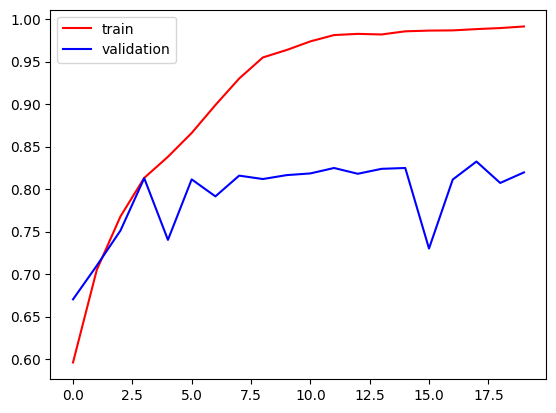

In [16]:
#for seeing graph
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


In [17]:
import cv2

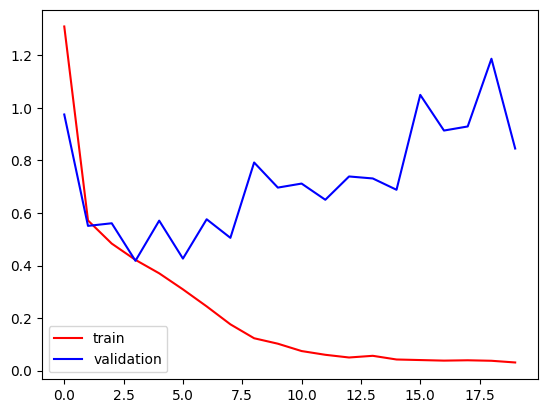

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


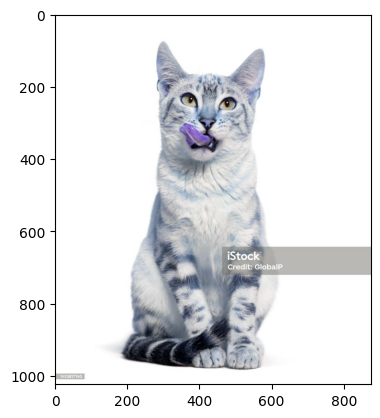

In [39]:
test_imag=cv2.imread('/content/2.jpg')
plt.imshow(test_imag)

In [24]:
test_imag.shape

(1024, 875, 3)

In [47]:
test_imag=cv2.resize(test_imag,(256,256))
test_input=test_imag.reshape(1,256,256,3)
a=model.predict(test_input)
a=a>0.5
if(a==0):
  pred='cat'
else:
  pred='dog'

print("our moidels says it is a :",pred)

1/1 [==============================] - 0s 18ms/step
our moidels says it is a : cat


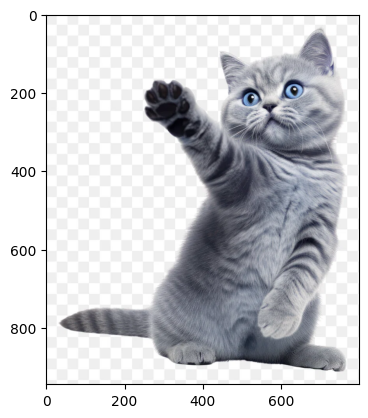

In [26]:
test_imag1=cv2.imread("/content/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIzLTA4L3Jhd3BpeGVsX29mZmljZV8zMF9hX3N0dWRpb19zaG90X29mX2NhdF93YXZpbmdfaW1hZ2VzZnVsbF9ib2R5X182YzRmM2YyOC0wMGJjLTQzNTYtYjM3ZC05NDM0NTgwY2FmNDcucG5n.webp")
plt.imshow(test_imag1)

In [48]:
test_imag1=cv2.resize(test_imag1,(256,256))
test_input1=test_imag1.reshape(1,256,256,3)
a=model.predict(test_input1)
a=a>0.5
if(a==0):
  pred='cat'
else:
  pred='dog'

print("our moidels says it is a :",pred)

1/1 [==============================] - 0s 22ms/step
our moidels says it is a : cat


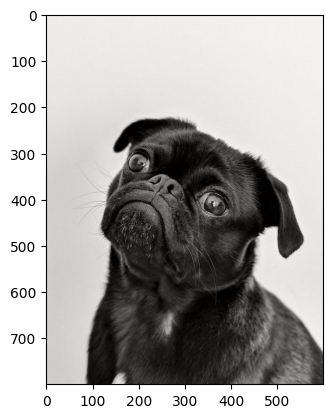

In [64]:
test_imag2=cv2.imread('/content/12.jpeg')
plt.imshow(test_imag2)

In [65]:
test_imag2=cv2.resize(test_imag2,(256,256))
test_input2=test_imag2.reshape(1,256,256,3)
a=model.predict(test_input2)
a=a>0.5
if(a==0):
  pred='cat'
else:
  pred='dog'

print("our moidels says it is a :",pred)

1/1 [==============================] - 0s 18ms/step
our moidels says it is a : dog


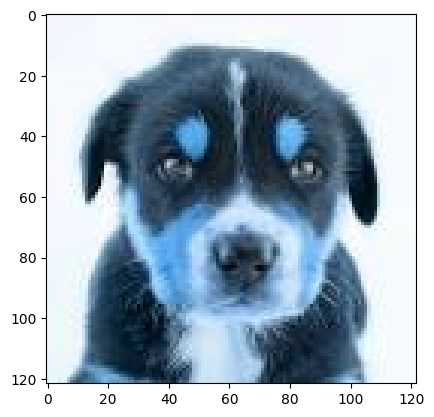

In [62]:
test_imag3=cv2.imread('/content/images (1).jpg')
plt.imshow(test_imag3)

In [63]:
test_imag3=cv2.resize(test_imag3,(256,256))
test_input3=test_imag3.reshape(1,256,256,3)
a=model.predict(test_input3)
a=a>0.5
if(a==0):
  pred='cat'
else:
  pred='dog'

print("our moidels says it is a :",pred)

1/1 [==============================] - 0s 18ms/step
our moidels says it is a : dog
